In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
df =  pd.read_csv("aml.csv")


In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [26]:
df.drop('nameOrig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)

isFraud
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

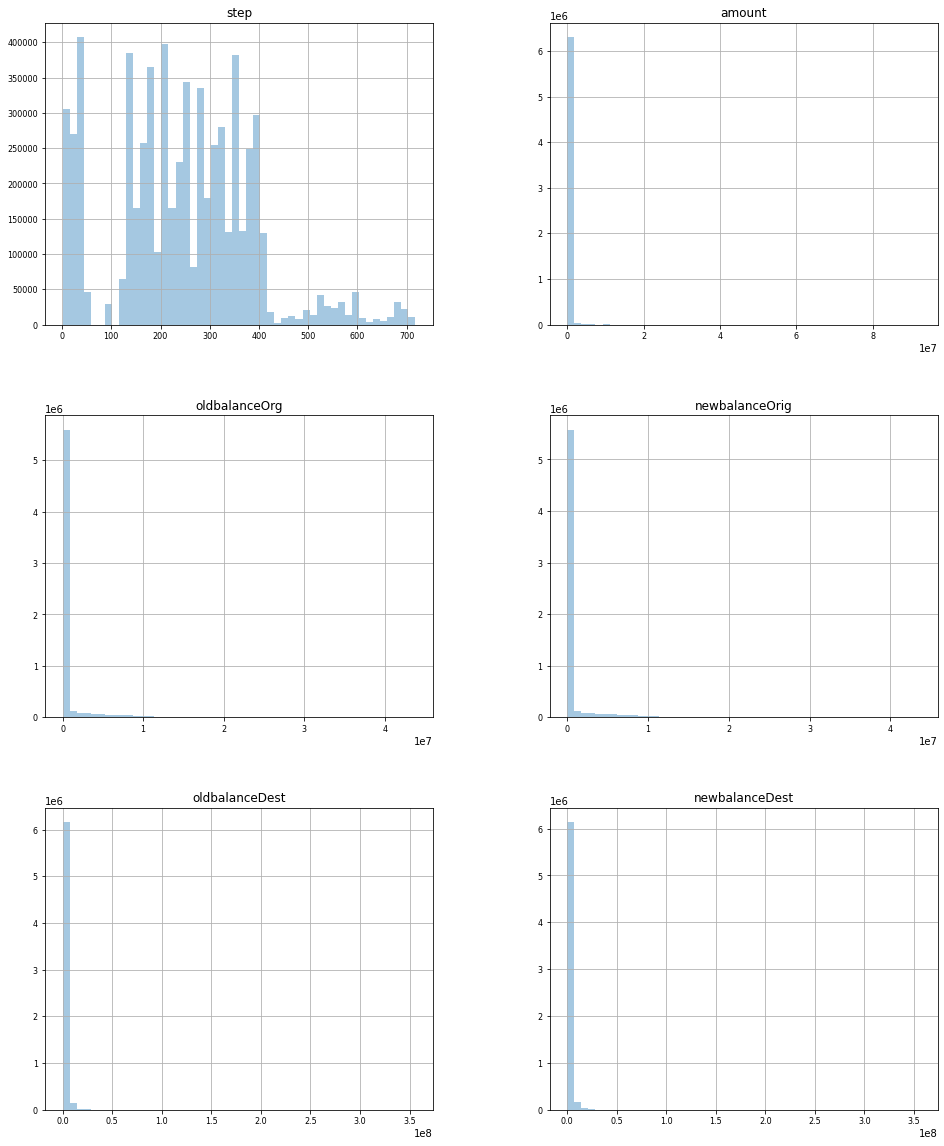

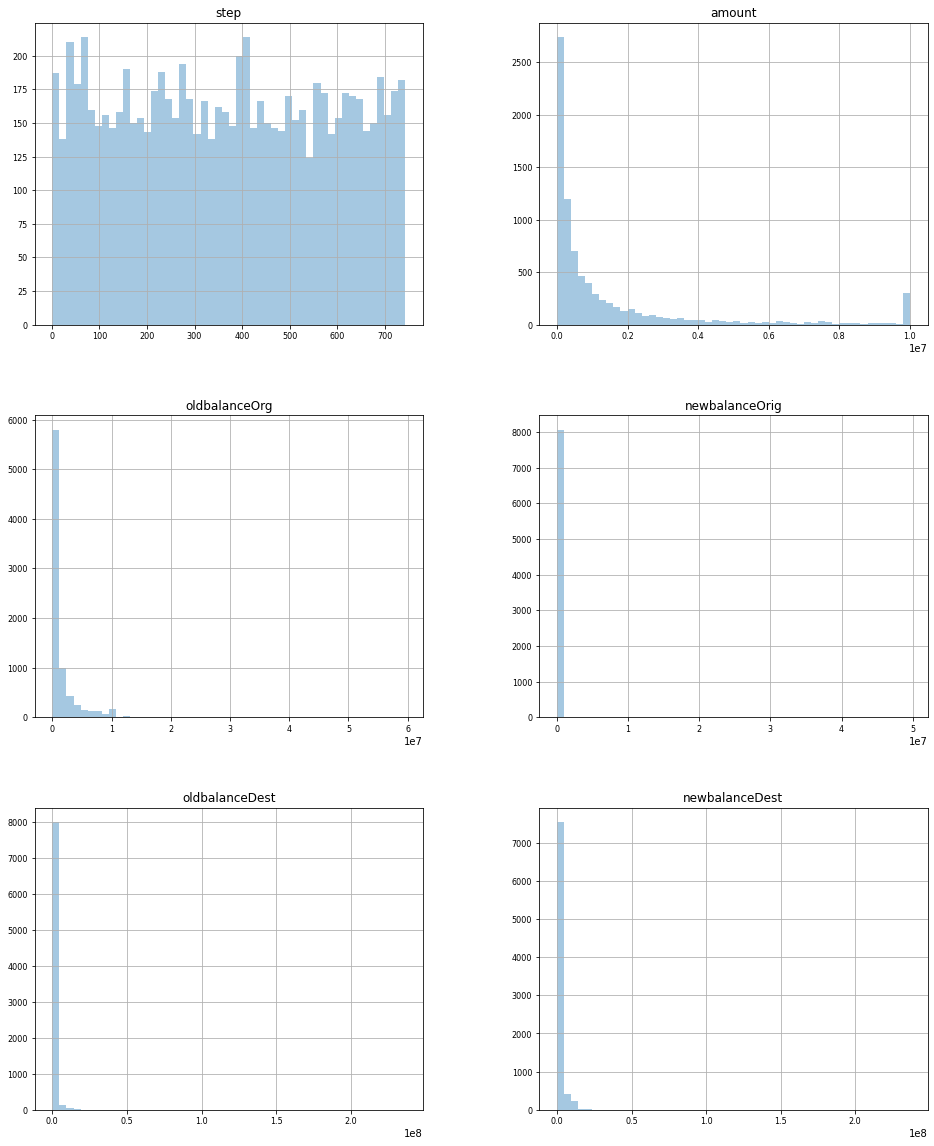

In [27]:
df.groupby('isFraud').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)


<AxesSubplot:title={'center':'Correlation Matrix'}>

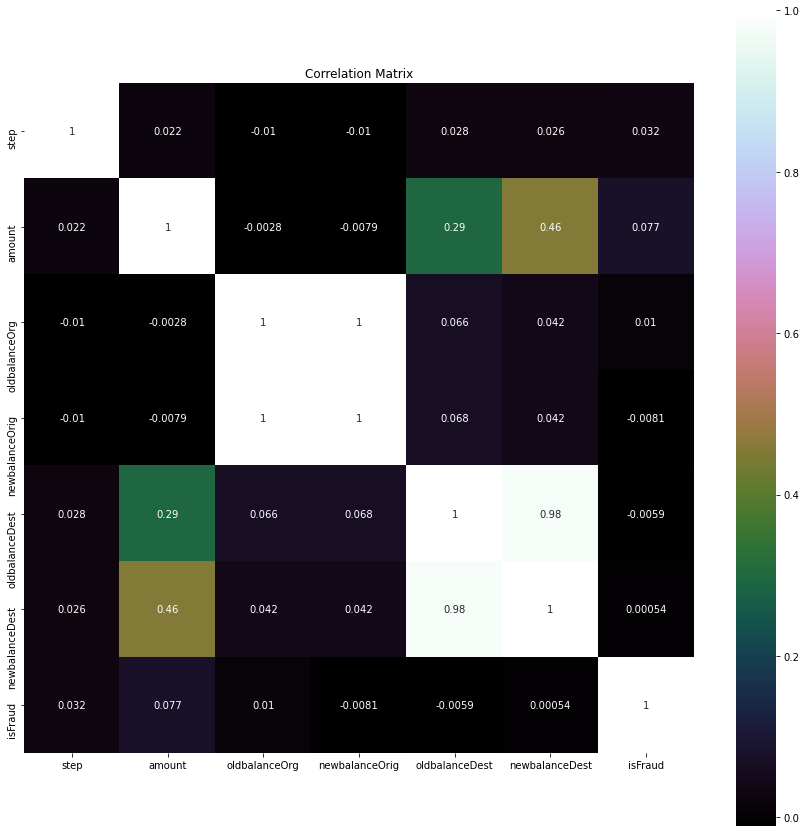

In [28]:
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [29]:
dum = pd.get_dummies(df['type'])
df1 = pd.concat([df,dum],axis=1)
df1.drop(['type'],axis=1, inplace=True)

0    19965
1       35
Name: isFraud, dtype: int64


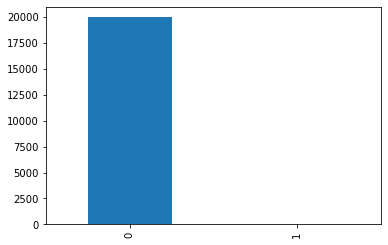

In [30]:
df2 = df1.sample(n=20000)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 24
Before OverSampling, counts of label '0': 13976 



In [33]:
sm = SMOTE(random_state=10,sampling_strategy=0.6)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)

Epoch 1/10
2237/2237 [==============================] - 3s 998us/step - loss: 0.4032 - accuracy: 0.8313
Epoch 2/10
2237/2237 [==============================] - 2s 1ms/step - loss: 0.1723 - accuracy: 0.9240
Epoch 3/10
2237/2237 [==============================] - 3s 1ms/step - loss: 0.1491 - accuracy: 0.9333
Epoch 4/10
2237/2237 [==============================] - 5s 2ms/step - loss: 0.1306 - accuracy: 0.9412
Epoch 5/10
2237/2237 [==============================] - 2s 1ms/step - loss: 0.1166 - accuracy: 0.9479
Epoch 6/10
2237/2237 [==============================] - 2s 1ms/step - loss: 0.1111 - accuracy: 0.9500
Epoch 7/10
2237/2237 [==============================] - 2s 1ms/step - loss: 0.1018 - accuracy: 0.9539
Epoch 8/10
2237/2237 [==============================] - 2s 1ms/step - loss: 0.0928 - accuracy: 0.9580
Epoch 9/10
2237/2237 [==============================] - 3s 1ms/step - loss: 0.0860 - accuracy: 0.9612
Epoch 10/10
2237/2237 [==============================] - 3s 1ms/step - loss: 0.0

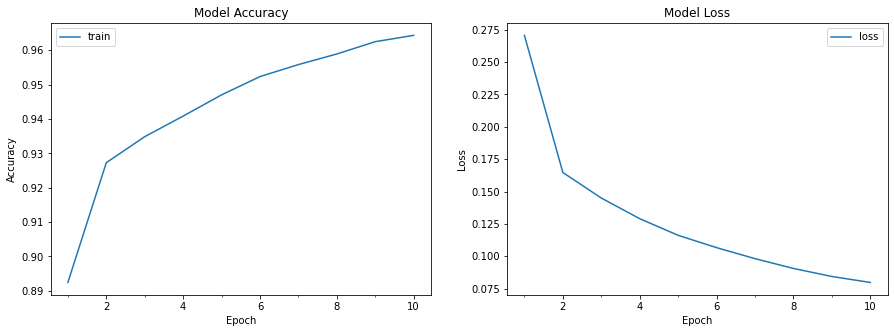

In [61]:
model = Sequential()

''' Adding the input layer and the first hidden layer '''

model.add(Dense(6, kernel_initializer='uniform', activation='relu', input_shape=(11,)))
''' Adding the second hidden layer '''

model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

''' Adding the output layer '''

model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

''' Compiling and fitting the model '''

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs = 10)

''' Plotting the training curves '''

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    ''' History for accuracy'''
    
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train'], loc='best')
    
    ''' History for loss'''
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['loss'], loc='best')
    plt.show()
    
plot_model_history(model_info)



In [62]:
''' Predicting the test results and '''

y_pred = model.predict_classes(x_test_scaled)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')

Accuracy: 98.23
Confusion matrix 
 [[5885  104]
 [   2    9]] 

Classification report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5989
           1       0.08      0.82      0.15        11

    accuracy                           0.98      6000
   macro avg       0.54      0.90      0.57      6000
weighted avg       1.00      0.98      0.99      6000
 

